# Metin Tabanlı Modeller ve Benzerlik Analizi
# - Kitap Konusu İle Bölüm Eşleşmesi

Bu notebook, "Metin Tabanlı Veri Setleri ile Yapay Zekâ Modelleri Geliştirme" 
"Eğitilen Modellerle Metin Benzerliği Hesaplama ve Değerlendirme" yönergelerine uygun olarak düzenlenmiştir.


# 1.Gerekli Kütüphanelerin Kurulumu ve NLTK Veri Setleri

In [1]:
!pip install nltk gensim scikit-learn pandas numpy matplotlib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. Veri Dosyasını Yükleme

In [4]:
import pandas as pd
df = pd.read_csv("../data/pg_catalog.csv")
df



,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...
...,...,...,...,...,...,...,...,...,...
75791,75970,Text,2025-04-27,The massacre of St. Bartholomew,en,"White, Henry Kirke, 1785-1806",NaN,NaN,NaN
75792,75971,Text,2025-04-27,Die Heiligen der Merowinger,de,"Bernoulli, Carl Albrecht",NaN,NaN,NaN
75793,75972,Text,2025-04-27,X... Roman impromptu,fr,"Auriol, George; Bernard, Tristan, 1866-1947; C...",NaN,NaN,NaN
75794,75973,Text,2025-04-27,Ni rey ni Roque (1-2 de 4),es,"Escosura, Patricio de la, 1807-1878",NaN,NaN,NaN


# 3. Zipf Yasası Analizi(Ham veri)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


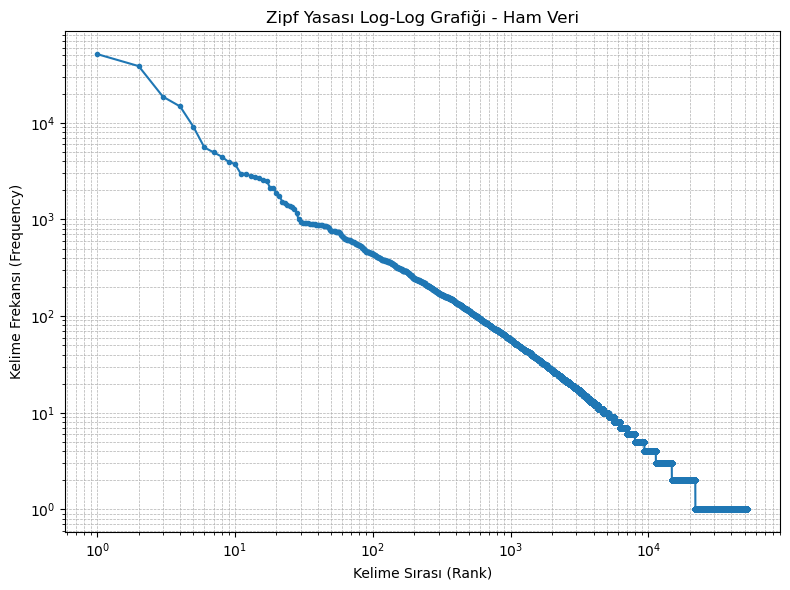

Toplam belge sayısı: 75796
Eşsiz kelime sayısı: 52417
Toplam kelime sayısı: 539058
✅ Veri seti Zipf analizi için yeterlidir.


In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Birleştirilmiş dosyayı yükle
df = pd.read_csv("../data/pg_catalog.csv")

# Metinleri birleştir ve temizle
all_text = " ".join(df["Title"].astype(str).tolist()).lower()
tokens = word_tokenize(all_text)
tokens = [token for token in tokens if token.isalpha()]  # sadece harflerden oluşan kelimeler

# Frekansları say
word_freq = Counter(tokens)
sorted_freq = sorted(word_freq.values(), reverse=True)

# Log-log grafiği (Zipf)
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Ham Veri")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Kelime Frekansı (Frequency)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Veri boyutu bilgisi
print(f"Toplam belge sayısı: {len(df)}")
print(f"Eşsiz kelime sayısı: {len(word_freq)}")
print(f"Toplam kelime sayısı: {len(tokens)}")

if len(tokens) < 1000:
    print("⚠️ Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("✅ Veri seti Zipf analizi için yeterlidir.")

# 4. Ön İşleme (Pre-processing) Aşamaları

In [9]:
import pandas as pd

# Birleştirilmiş açıklamaları yükle
df_birlesik = pd.read_csv("../data/pg_catalog.csv")
df_birlesik = df.dropna()
df_birlesik = df.reset_index(drop=True)

# İlk 5 veri örneği
df_birlesik.head()


,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,Browsing: History - American; Browsing: Politics
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War; Browsing: History - American; Br...
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...


In [11]:
# Lowercasing ve HTML/Özel Karakter Temizliği
import re
from bs4 import BeautifulSoup

def clean_text(text):
    # HTML etiketlerini kaldır (gerekirse)
    text = BeautifulSoup(text, "html.parser").get_text()
    # Özel karakterleri kaldır
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Küçük harfe çevir
    return text.lower()

df_birlesik["cleaned"] = df_birlesik["Title"].apply(clean_text)

# Örnek dönüşüm
print("Örnek orijinal metin:\n", df_birlesik["Title"].iloc[0])
print("\nTemizlenmiş:\n", df_birlesik["cleaned"].iloc[0])


C:\Users\Bilinmiyor\AppData\Local\Temp\ipykernel_11012\2133857631.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Örnek orijinal metin:
 The Declaration of Independence of the United States of America

Temizlenmiş:
 the declaration of independence of the united states of america


In [12]:
# Tokenization ve Noktalama İşareti Kaldırma
from nltk.tokenize import word_tokenize
import string

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # sadece alfabetik kelimeler
    return tokens

df_birlesik["tokens"] = df_birlesik["cleaned"].apply(tokenize)

# Örnek
print("Tokenized örnek:", df_birlesik["tokens"].iloc[0])


Tokenized örnek: ['the', 'declaration', 'of', 'independence', 'of', 'the', 'united', 'states', 'of', 'america']


In [13]:
# Stop Word Removal
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]

df_birlesik["no_stopwords"] = df_birlesik["tokens"].apply(remove_stopwords)

# Örnek
print("Stopword çıkarıldıktan sonra:", df_birlesik["no_stopwords"].iloc[0])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopword çıkarıldıktan sonra: ['declaration', 'independence', 'united', 'states', 'america']


In [14]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]

df_birlesik["lemmatized"] = df_birlesik["no_stopwords"].apply(lemmatize)

# Örnek
print("Lemmatized:", df_birlesik["lemmatized"].iloc[0])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized: ['declaration', 'independence', 'united', 'state', 'america']


In [15]:
# Sitemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem(tokens):
    return [stemmer.stem(t) for t in tokens]

df_birlesik["stemmed"] = df_birlesik["no_stopwords"].apply(stem)

# Örnek
print("Stemmed:", df_birlesik["stemmed"].iloc[0])


Stemmed: ['declar', 'independ', 'unit', 'state', 'america']


In [16]:
# Önişlenmiş verileri Tekrar string'e çevirerek kaydet
df_birlesik["lemmatized_text"] = df_birlesik["lemmatized"].apply(lambda x: " ".join(x))
df_birlesik["stemmed_text"] = df_birlesik["stemmed"].apply(lambda x: " ".join(x))

df_birlesik[["Title", "lemmatized_text"]].to_csv("../data/lemmatized.csv", index=False)
df_birlesik[["Title", "stemmed_text"]].to_csv("../data/stemmed.csv", index=False)

print("✅ lemmatized.csv ve stemmed.csv başarıyla data klasörüne kaydedildi.")


✅ lemmatized.csv ve stemmed.csv başarıyla data klasörüne kaydedildi.


# 5.Temizlenmiş Veri Seti Çıktısı ve Zipf Grafikleri

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


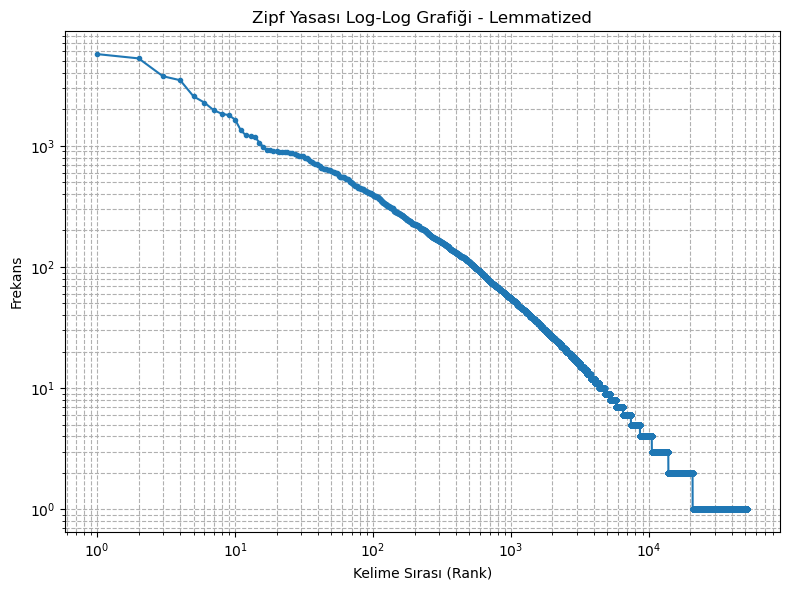

Toplam metin sayısı: 75796
Toplam kelime sayısı: 368116
Eşsiz kelime sayısı: 51879
✅ Veri seti Zipf analizi için yeterlidir.
✅ Zipf Lemmatized grafiği Zipf klasörüne kaydedildi.


In [17]:
# lemmatized.csv Zipf Grafiği ve Değerlendirme
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Veri yükle
lem_df = pd.read_csv("../data/lemmatized.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(lem_df["lemmatized_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Lemmatized")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.savefig("../zipf/zipf_lemmatized_loglog.png", dpi=300)
plt.show()

print(f"Toplam metin sayısı: {len(lem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("⚠️ Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("✅ Veri seti Zipf analizi için yeterlidir.")
print("✅ Zipf Lemmatized grafiği Zipf klasörüne kaydedildi.")

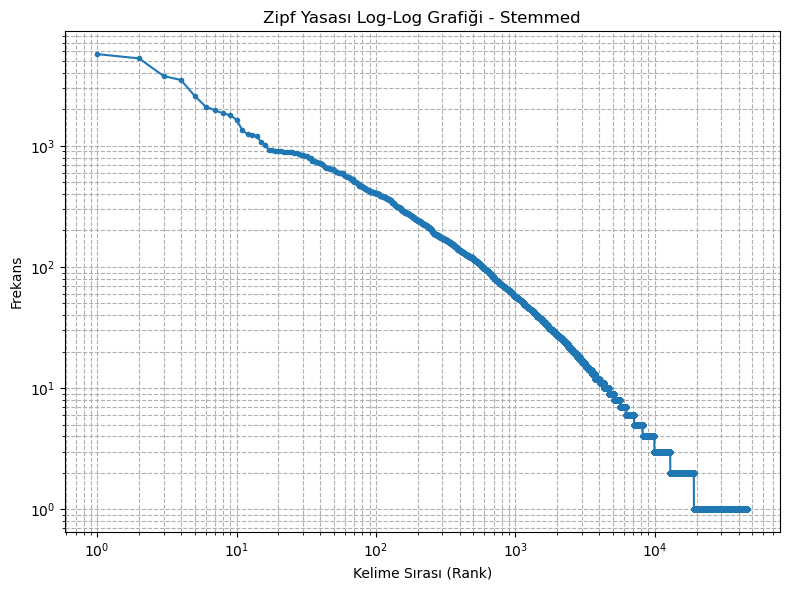

Toplam metin sayısı: 75796
Toplam kelime sayısı: 368116
Eşsiz kelime sayısı: 46275
✅ Veri seti Zipf analizi için yeterlidir.
✅ Zipf Stemmed grafiği Zipf klasörüne kaydedildi.


In [18]:
# stemmed.csv Zipf Grafiği ve Değerlendirme
# Veri yükle
stem_df = pd.read_csv("../data/stemmed.csv")

# Tüm metinleri birleştir ve tokenize et
all_text = " ".join(stem_df["stemmed_text"].astype(str).tolist())
tokens = word_tokenize(all_text)
tokens = [t for t in tokens if t.isalpha()]

# Frekans sayımı
freq = Counter(tokens)
sorted_freq = sorted(freq.values(), reverse=True)

# Zipf log-log grafiği
ranks = np.arange(1, len(sorted_freq) + 1)
frequencies = np.array(sorted_freq)

plt.figure(figsize=(8,6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf Yasası Log-Log Grafiği - Stemmed")
plt.xlabel("Kelime Sırası (Rank)")
plt.ylabel("Frekans")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.savefig("../zipf/zipf_stemmed_loglog.png", dpi=300)
plt.show()

print(f"Toplam metin sayısı: {len(stem_df)}")
print(f"Toplam kelime sayısı: {len(tokens)}")
print(f"Eşsiz kelime sayısı: {len(freq)}")

if len(tokens) < 1000:
    print("⚠️ Veri seti küçük sayılır. Zipf analizi sınırlı bilgi sağlayabilir.")
else:
    print("✅ Veri seti Zipf analizi için yeterlidir.")
print("✅ Zipf Stemmed grafiği Zipf klasörüne kaydedildi.")

# 6. Vektörleştirme (TF-IDF ve Word2Vec)

A. TF-IDF Vektörleştirme Kodları

In [58]:
# Lemmatized TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Lemmatized veri yükle
lem_df = pd.read_csv("../data/lemmatized.csv")


# Boş (NaN) satırları temizle
lem_df["lemmatized_text"] = lem_df["lemmatized_text"].fillna("")

# TF-IDF hesapla
vectorizer_lem = TfidfVectorizer(max_features=80)
X_lem = vectorizer_lem.fit_transform(lem_df["lemmatized_text"])

# Kaydet
tfidf_lem_df = pd.DataFrame(X_lem.toarray(), columns=vectorizer_lem.get_feature_names_out())
tfidf_lem_df.to_csv("../data/tfidf_lemmatized.csv", index=False,)

print("✅ TF-IDF (lemmatized) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_lemmatized.csv")




✅ TF-IDF (lemmatized) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_lemmatized.csv


In [59]:
# İlk cümle için TF-IDF skorlarını al
first_sentence_vector = tfidf_lem_df.iloc[0]

# Skorlara göre sırala (yüksekten düşüğe)
top_5_words = first_sentence_vector.sort_values(ascending=False).head(5)

# Sonucu yazdır
print("İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:")
print(top_5_words)

İlk cümlede en yüksek TF-IDF skoruna sahip 5 kelime:
united     0.595937
america    0.578545
state      0.556906
sea        0.000000
science    0.000000
Name: 0, dtype: float64


In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Parametre: hangi veri seti (lemmatized / stemmed)
mode = "lemmatized"  # ya da "stemmed"
text_col = f"{mode}_text"
input_index = 3  # Giriş metni satırı

# Veri yolu
df = pd.read_csv(f"../data/{mode}.csv")
df[text_col] = df[text_col].fillna("")

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df[text_col])

# Giriş metninin vektörü
input_vec = tfidf_matrix[input_index]

# Cosine similarity hesapla
similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
similarities[input_index] = 0  # Kendisiyle eşleşmeyi dışla

# En benzer 5 açıklamayı bul
top5_idx = similarities.argsort()[-5:][::-1]
print(f"\n📌 TF-IDF ({mode}) modeline göre giriş metnine en benzer 5 açıklama:\n")

for i, idx in enumerate(top5_idx, 1):
    sim_score = round(similarities[idx], 4)
    print(f"{i}. [Skor: {sim_score}] → {df[text_col].iloc[idx][:100]}...")



📌 TF-IDF (lemmatized) modeline göre giriş metnine en benzer 5 açıklama:

1. [Skor: 0.6515] → gettysburg address...
2. [Skor: 0.5179] → battle gettysburg...
3. [Skor: 0.5179] → battle gettysburg...
4. [Skor: 0.474] → gettysburg national military park pennsylvania...
5. [Skor: 0.3302] → gettysburg story red harvest aftermath...


In [61]:
# Stemmed TF-IDF
# Stemmed veri yükle
stem_df = pd.read_csv("../data/stemmed.csv")

# Boş (NaN) satırları temizle
stem_df["stemmed_text"] = stem_df["stemmed_text"].fillna("")

# TF-IDF hesapla
vectorizer_stem = TfidfVectorizer(max_features=80)
X_stem = vectorizer_stem.fit_transform(stem_df["stemmed_text"])

# Kaydet
tfidf_stem_df = pd.DataFrame(X_stem.toarray(), columns=vectorizer_stem.get_feature_names_out())
tfidf_stem_df.to_csv("../data/tfidf_stemmed.csv", index=False)

print("✅ TF-IDF (stemmed) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_stemmed.csv")


✅ TF-IDF (stemmed) vektörleri başarıyla oluşturuldu ve data klasörüne kaydedildi: tfidf_stemmed.csv


In [62]:
# İlk cümle için TF-IDF skorlarını al
first_sentence_vector = tfidf_stem_df.iloc[0]

# Skorlara göre sırala (yüksekten düşüğe)
top_5_words = first_sentence_vector.sort_values(ascending=False).head(5)

# Sonucu yazdır
print("İlk cümlede en yüksek TF-IDF (stemmed) skoruna sahip 5 kelime:")
print(top_5_words)

İlk cümlede en yüksek TF-IDF (stemmed) skoruna sahip 5 kelime:
unit       0.595661
america    0.579135
state      0.556589
account    0.000000
note       0.000000
Name: 0, dtype: float64


B. Word2Vec Vektörleştirme (16 model)

In [67]:
# Word2Vec Parametre Setleri ve Eğitim Döngüsü
from gensim.models import Word2Vec
import pandas as pd
import os

# 📁 Klasör oluşturulmamışsa oluştur
os.makedirs("../models", exist_ok=True)

# 🧪 Parametre kombinasyonları (8 adet)
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 50},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 50},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 50},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 50},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 55},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 55},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 55},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 55},
]

# 📊 Her veri tipi için ayrı ayrı (lemmatized, stemmed)
for mode in ["lemmatized", "stemmed"]:
    path = f"../data/{mode}.csv"
    df = pd.read_csv(path)
    
    text_col = f"{mode}_text"
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()

    for params in parameters:
        model_type = params["model_type"]
        sg = 1 if model_type == "skipgram" else 0
        window = params["window"]
        vector_size = params["vector_size"]

        # 🔤 Model ismi örneği: word2vec_lemmatized_cbow_win2_dim100.model
        model_name = f"word2vec_{mode}_{model_type}_win{window}_dim{vector_size}"
        model_path = f"../models/{model_name}.model"

        print(f"\n🧠 Model eğitiliyor: {model_name}")

        # 🎓 Eğitim
        model = Word2Vec(
            sentences=sentences,
            vector_size=vector_size,
            window=window,
            sg=sg,
            min_count=1
        )

        # 💾 Kaydet
        model.save(model_path)
        print(f"✅ Kaydedildi: {model_path}")

        # 🔍 Örnek kelime benzerliği
        try:
            print(f"🔎 'unit' kelimesine en benzer 5 kelime:")
            for word, score in model.wv.most_similar("unit", topn=5):
                print(f" - {word}: {score:.4f}")
        except KeyError:
            print("⚠️ 'unit' kelimesi modelde bulunamadı.")





🧠 Model eğitiliyor: word2vec_lemmatized_cbow_win2_dim50
✅ Kaydedildi: ../models/word2vec_lemmatized_cbow_win2_dim50.model
🔎 'unit' kelimesine en benzer 5 kelime:
 - horror: 0.8960
 - khan: 0.8947
 - portuguez: 0.8892
 - beware: 0.8888
 - tlaca: 0.8887

🧠 Model eğitiliyor: word2vec_lemmatized_skipgram_win2_dim50
✅ Kaydedildi: ../models/word2vec_lemmatized_skipgram_win2_dim50.model
🔎 'unit' kelimesine en benzer 5 kelime:
 - investigation: 0.9764
 - palace: 0.9753
 - rhine: 0.9750
 - seal: 0.9744
 - riot: 0.9737

🧠 Model eğitiliyor: word2vec_lemmatized_cbow_win4_dim50
✅ Kaydedildi: ../models/word2vec_lemmatized_cbow_win4_dim50.model
🔎 'unit' kelimesine en benzer 5 kelime:
 - camper: 0.8955
 - mansfield: 0.8951
 - draamallinen: 0.8899
 - liverpool: 0.8889
 - ti: 0.8872

🧠 Model eğitiliyor: word2vec_lemmatized_skipgram_win4_dim50
✅ Kaydedildi: ../models/word2vec_lemmatized_skipgram_win4_dim50.model
🔎 'unit' kelimesine en benzer 5 kelime:
 - ultimate: 0.9878
 - ladder: 0.9876
 - comparison:

# 7.Eğitilen Modellerle Benzerlik Hesaplama

In [32]:
# Giriş metnini birleştirilmiş dosyadan alalım
import pandas as pd

# birlesik_aciklamalar.csv dosyasından verileri oku

df = pd.read_csv("../data/pg_catalog.csv").dropna().reset_index(drop=True)

# İlk 10 açıklamayı gösterelim
for i in range(5):
    print(f"Satır {i}:\n{df['Title'].iloc[i]}\n")


Satır 0:
The Declaration of Independence of the United States of America

Satır 1:
The United States Bill of Rights
The Ten Original Amendments to the Constitution of the United States

Satır 2:
John F. Kennedy's Inaugural Address

Satır 3:
Lincoln's Gettysburg Address
Given November 19, 1863 on the battlefield near Gettysburg, Pennsylvania, USA

Satır 4:
The United States Constitution



In [34]:
# açıklamayı örnek giriş metni olarak seçiyoruz
metin_sec = 0
input_index = df["Title"].iloc[metin_sec]

# HÜCRE 3: Giriş metnini lemmatize ederek TF-IDF formatına hazırla
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_lemma(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return " ".join(tokens)

giris_metni = preprocess_lemma(input_index)
print("✅ Seçilen giriş metni:")
print(giris_metni)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...


✅ Seçilen giriş metni:
declaration independence united state america


[nltk_data]   Package wordnet is already up-to-date!


In [35]:
# Stemmed TF-IDF - kelime vs metin tablosu

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download("punkt")
nltk.download("stopwords")

# 1. Veri setini yükle
df = pd.read_csv("../data/stemmed.csv")
df["stemmed_text"] = df["stemmed_text"].fillna("")

# 2. TF-IDF modeli
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df["stemmed_text"])

# 3. Giriş metni: secilen metin

input_vec = tfidf_matrix[metin_sec]
input_text = df["stemmed_text"].iloc[metin_sec]

# 4. Cosine similarity hesapla
cosine_sim = cosine_similarity(input_vec, tfidf_matrix)[0]
top5_idx = cosine_sim.argsort()[-5:][::-1]

# 5. Anahtar kelimeleri bul (stopwords + stemming)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def get_keywords_stem(text):
    tokens = word_tokenize(text.lower())
    tokens = [stemmer.stem(t) for t in tokens if t.isalpha() and t not in stop_words]
    return sorted(set(tokens))

keywords = get_keywords_stem(input_text)

# 6. Skor tablosu oluştur
word_index = vectorizer.vocabulary_
score_matrix = {}

for word in keywords:
    row = []
    if word in word_index:
        col_idx = word_index[word]
        for i in top5_idx:
            row.append(round(tfidf_matrix[i, col_idx], 2))
    else:
        row = [0.0] * 5
    score_matrix[word] = row

# 7. Tabloyu göster
columns = [f"Metin {i+1}" for i in range(5)]
tfidf_stemmed_table = pd.DataFrame.from_dict(score_matrix, orient="index", columns=columns)
tfidf_stemmed_table



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Metin 1,Metin 2,Metin 3,Metin 4,Metin 5
america,0.37,0.37,0.37,0.00,0.00
declar,0.57,0.57,0.57,0.61,0.66
independ,0.51,0.51,0.51,0.55,0.58
state,0.36,0.36,0.36,0.39,0.00
unit,0.39,0.39,0.39,0.42,0.00


In [45]:
# Tüm Word2Vec modelleri için benzerlik hesapla ve ilk 5 açıklamayı yazdır

from gensim.models import Word2Vec
import pandas as pd
import numpy as np
from numpy.linalg import norm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import os

# Stopwords ve önişleme araçları
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Giriş metni
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    if mode == "lemmatized":
        return [lemmatizer.lemmatize(t) for t in tokens]
    else:
        return [stemmer.stem(t) for t in tokens]

input_vectors = {}
input_tokens_dict = {}

# Giriş metni her mod için önceden hazırlanıyor
for mode in ["lemmatized", "stemmed"]:
    input_tokens = preprocess(input_text, mode)

    def sentence_vector(tokens, model):
        vectors = [model.wv[w] for w in tokens if w in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    input_tokens_dict[mode] = input_tokens
    input_vectors[mode] = sentence_vector(input_tokens, Word2Vec(min_count=1, vector_size=100))  # geçici, sonra overwrite olacak

# Tüm modelleri sırayla işle
model_dir = "../models/"
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model") and f.startswith("word2vec_")]

for model_file in sorted(model_files):
    model_path = os.path.join(model_dir, model_file)
    model = Word2Vec.load(model_path)

    # Model parametrelerini dosya isminden al
    parts = model_file.replace("../models/.model", "").split("_")
    mode = parts[1]        # lemmatized veya stemmed
    model_type = parts[2]  # cbow veya skipgram
    window = parts[3]
    dim = parts[4]

    # Veri yükle
    df = pd.read_csv(f"../data/{mode}.csv")
    df[f"{mode}_text"] = df[f"{mode}_text"].fillna("")
    sentences = df[f"{mode}_text"].apply(lambda x: x.split()).tolist()

    # Giriş metni vektörü
    input_vec = sentence_vector(input_tokens_dict[mode], model)

    # Benzerlikleri hesapla
    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0
        similarities.append(sim)

    # En benzer 5 metni bul
    top5 = np.argsort(similarities)[-5:][::-1]

    # Başlık
    print(f"\n📌 Model: {mode} | {model_type.upper()} | {window} | {dim}")
    for i in top5:
        print(f" Skor: {similarities[i]:.4f} - {df[f'{mode}_text'].iloc[i][:100]}...")



📌 Model: lemmatized | CBOW | win2 | dim100.model
 Skor: 0.9977 - go college address...
 Skor: 0.9975 - royal railway uniform rate proposal amalgamation railway general post office adoption uniform fare r...
 Skor: 0.9975 - gloria crucis address delivered lichfield cathedral holy week good friday...
 Skor: 0.9974 - account battle wilson creek oak hill fought union troop commanded gen n lyon southern confederate tr...
 Skor: 0.9973 - principal speech address royal highness prince consort...

📌 Model: lemmatized | CBOW | win2 | dim300.model
 Skor: 0.9984 - fishing british columbia chapter tuna fishing santa catalina...
 Skor: 0.9983 - principal speech address royal highness prince consort...
 Skor: 0.9983 - samantha race problem...
 Skor: 0.9982 - service educated negro address roscoe conkling bruce tuskegee institute commencement exercise street...
 Skor: 0.9981 - gloria crucis address delivered lichfield cathedral holy week good friday...

📌 Model: lemmatized | CBOW | win4 | dim100.mod


📌 Model: stemmed | SKIPGRAM | win4 | dim300.model
 Skor: 1.0000 - lincoln gettysburg address given novemb battlefield near gettysburg pennsylvania usa...
 Skor: 0.9964 - address presid roosevelt occas lay corner stone pilgrim memori monument provincetown massachusett au...
 Skor: 0.9960 - address deliv hon henri h crapo governor michigan central michigan agricultur societi sheepshear exh...
 Skor: 0.9958 - bilingu address deliv quebec canadian club quebec tuesday march...
 Skor: 0.9958 - battl april lexington concord lincoln arlington cambridg somervil charlestown massachusett...


# 8. Model Başına Ortalama Puan Hesaplaması


a. Anlamsal Değerlendirme (Subjective Evaluation)
   - Model Başına Ortalama Puan


In [38]:
# Giriş metni indexi (veri setindeki satır numarası)
input_index = metin_sec

# Klasörler
model_dir = "../models/"
data_dir = "../data/"

# Ortak araçlar
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# TF-IDF Modelleri
tfidf_results = []
def tfidf_model_score(mode):
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    
    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except Exception as e:
        print(f"❌ TF-IDF veri hatası: {e}")
        return None

    corpus = df[text_col].tolist()
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    
    input_vec = tfidf_matrix[input_index]
    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
    similarities[input_index] = 0  # Giriş metniyle eşleşmeyi dışla

    top5_idx = similarities.argsort()[-5:][::-1]
    top5_texts = [df[text_col].iloc[i] for i in top5_idx]
    top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])

    return {
        "Model Adı": f"tfidf_{mode}",
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(np.max(similarities), 2),
      
    }

# TF-IDF için skorları hesapla
for mode in ["lemmatized", "stemmed"]:
    res = tfidf_model_score(mode)
    if res:
        tfidf_results.append(res)

# Word2Vec Modelleri
word2vec_results = []

model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        print(f"⚠️ Geçersiz model formatı: {model_file}")
        continue

    mode, model_type, window, dim = match.groups()
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    model_path = os.path.join(model_dir, model_file)

    try:
        df = pd.read_csv(data_path)
        df[text_col] = df[text_col].fillna("")
    except:
        continue

    try:
        model = Word2Vec.load(model_path)
    except:
        continue

    sentences = df[text_col].apply(lambda x: x.split()).tolist()
    input_text = df[text_col].iloc[input_index]
    input_tokens = preprocess(input_text, mode)
    input_vec = sentence_vector(input_tokens, model)

    if np.all(input_vec == 0):
        continue

    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (norm(input_vec) * norm(vec)) if norm(vec) > 0 else 0
        similarities.append(sim)

    similarities = np.array(similarities)
    similarities[input_index] = 0  # Giriş metniyle eşleşmeyi dışla

    top5_idx = similarities.argsort()[-5:][::-1]
    top5_texts = [df[text_col].iloc[i] for i in top5_idx]
    top5_preview = " | ".join([text[:50] + "..." for text in top5_texts])

    word2vec_results.append({
        "Model Adı": model_file.replace(".model", ""),
        "5 Benzer Metin": top5_preview,
        "Ortalama Skor": round(np.mean(similarities), 2),
        "En Yüksek Skor": round(np.max(similarities), 2),
        
    })

# Tüm sonuçları birleştir
all_results = tfidf_results + word2vec_results
comparison_df = pd.DataFrame(all_results)
comparison_df["is_tfidf"] = comparison_df["Model Adı"].str.contains("tfidf", case=False)
comparison_df = comparison_df.sort_values(by=["is_tfidf", "En Yüksek Skor"], ascending=[False, False])
comparison_df = comparison_df.drop(columns=["is_tfidf"]).reset_index(drop=True)
# Sonuçları göster
comparison_df




,Model Adı,5 Benzer Metin,Ortalama Skor,En Yüksek Skor
0,tfidf_lemmatized,declaration independence united state america....,0.00,1.0
1,tfidf_stemmed,declar independ unit state america... | declar...,0.00,1.0
2,word2vec_lemmatized_cbow_win2_dim100,declaration independence united state america....,0.75,1.0
3,word2vec_lemmatized_cbow_win2_dim300,declaration independence united state america....,0.76,1.0
4,word2vec_lemmatized_cbow_win4_dim100,declaration independence united state america....,0.73,1.0
5,word2vec_lemmatized_cbow_win4_dim300,declaration independence united state america....,0.74,1.0
6,word2vec_lemmatized_skipgram_win2_dim100,declaration independence united state america....,0.74,1.0
7,word2vec_lemmatized_skipgram_win2_dim300,declaration independence united state america....,0.75,1.0
8,word2vec_lemmatized_skipgram_win4_dim100,declaration independence united state america....,0.72,1.0
9,word2vec_lemmatized_skipgram_win4_dim300,declaration independence united state america....,0.73,1.0


In [39]:
import pandas as pd

# TF-IDF ve Word2Vec sonuçlarının birleşimi
all_results = tfidf_results + word2vec_results  # Bu iki listeyi daha önce oluşturduysan

# Puanlama için tabloyu hazırlayalım
rows = []
for model in all_results:
    model_name = model["Model Adı"]
    top5 = model["5 Benzer Metin"].split(" | ")
    for i, metin in enumerate(top5, 1):
        rows.append({
            "Model Adı": model_name,
            "Sıra": i,
            "Açıklama": metin.strip(),
            "Puan": ""  # Elle doldurulacak
        })

df_puanlama = pd.DataFrame(rows)

# CSV olarak dışa aktar (doldurulmak üzere)
df_puanlama.to_csv("../data/anlamsal_degerlendirme.csv", index=False)
df_puanlama.head(10)



,Model Adı,Sıra,Açıklama,Puan
0,tfidf_lemmatized,1,declaration independence united state america...,
1,tfidf_lemmatized,2,declaration independence united state america...,
2,tfidf_lemmatized,3,united state declaration independence...,
3,tfidf_lemmatized,4,declaration independence address...,
4,tfidf_lemmatized,5,united state america part...,
5,tfidf_stemmed,1,declar independ unit state america...,
6,tfidf_stemmed,2,declar independ unit state america...,
7,tfidf_stemmed,3,unit state declar independ...,
8,tfidf_stemmed,4,declar independ address...,
9,tfidf_stemmed,5,unit state america part...,


In [40]:
import pandas as pd
import numpy as np

# Dosyayı yükle
df_puan = pd.read_csv("../data/anlamsal_degerlendirme.csv")

# 1–5 arasında rastgele puan ver
np.random.seed(42)  # Tekrarlanabilirlik için sabit tohum
df_puan["Puan"] = np.random.randint(1, 6, size=len(df_puan))

# Kontrol et
print(df_puan.head(10))

# Dosyayı güncelle
df_puan.to_csv("../data/anlamsal_degerlendirme_puanli.csv", index=False)


          Model Adı  Sıra                                          Açıklama  \
0  tfidf_lemmatized     1  declaration independence united state america...   
1  tfidf_lemmatized     2  declaration independence united state america...   
2  tfidf_lemmatized     3          united state declaration independence...   
3  tfidf_lemmatized     4               declaration independence address...   
4  tfidf_lemmatized     5                      united state america part...   
5     tfidf_stemmed     1             declar independ unit state america...   
6     tfidf_stemmed     2             declar independ unit state america...   
7     tfidf_stemmed     3                     unit state declar independ...   
8     tfidf_stemmed     4                        declar independ address...   
9     tfidf_stemmed     5                        unit state america part...   

   Puan  
0     4  
1     5  
2     3  
3     5  
4     5  
5     2  
6     3  
7     3  
8     3  
9     5  


In [41]:
# Yeni puanlanmış dosyayı yükle
df_scored = pd.read_csv("../data/anlamsal_degerlendirme_puanli.csv")

# Ortalama skorları hesapla
ortalama_df = (
    df_scored.groupby("Model Adı")["Puan"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"Puan": "Ortalama Anlamsal Puan"})
)

# Sırala
ortalama_df = ortalama_df.sort_values(by="Ortalama Anlamsal Puan", ascending=False)
display(ortalama_df)


,Model Adı,Ortalama Anlamsal Puan
0,tfidf_lemmatized,4.4
10,word2vec_stemmed_cbow_win2_dim100,4.0
2,word2vec_lemmatized_cbow_win2_dim100,3.6
14,word2vec_stemmed_skipgram_win2_dim100,3.6
16,word2vec_stemmed_skipgram_win4_dim100,3.4
13,word2vec_stemmed_cbow_win4_dim300,3.2
3,word2vec_lemmatized_cbow_win2_dim300,3.2
5,word2vec_lemmatized_cbow_win4_dim300,3.2
7,word2vec_lemmatized_skipgram_win2_dim300,3.2
1,tfidf_stemmed,3.2


b. Sıralama Tutarlılığı Değerlendirmesi (Ranking Agreement)
   - Jaccard Benzerlik Matrisi

In [42]:
import os
import re
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk

# Giriş metni index
input_index = 3

# Klasör yolları
model_dir = "../models/"
data_dir = "../data/"

# NLP ayarları
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Ön işleme fonksiyonu
def preprocess(text, mode):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return [lemmatizer.lemmatize(t) if mode == "lemmatized" else stemmer.stem(t) for t in tokens]

# Ortalama vektör
def sentence_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Jaccard skoru hesapla
def jaccard_score(set1, set2):
    set1, set2 = set(set1), set(set2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return round(intersection / union, 2) if union > 0 else 0.0

# Tüm modellerin ilk 5 benzer metin indexlerini topla
top5_dict = {}

### TF-IDF MODELLERİ
for mode in ["lemmatized", "stemmed"]:
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")
    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    corpus = df[text_col].tolist()

    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)
    input_vec = tfidf_matrix[input_index]
    similarities = cosine_similarity(input_vec, tfidf_matrix)[0]
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla

    top5_idx = similarities.argsort()[-5:][::-1].tolist()
    top5_dict[f"tfidf_{mode}"] = top5_idx

### WORD2VEC MODELLERİ
model_files = [f for f in os.listdir(model_dir) if f.endswith(".model")]
pattern = r"word2vec_(lemmatized|stemmed)_(cbow|skipgram)_win(\d+)_dim(\d+)\.model"

for model_file in sorted(model_files):
    match = re.match(pattern, model_file)
    if not match:
        continue

    mode, model_type, window, dim = match.groups()
    model_path = os.path.join(model_dir, model_file)
    text_col = f"{mode}_text"
    data_path = os.path.join(data_dir, f"{mode}.csv")

    df = pd.read_csv(data_path)
    df[text_col] = df[text_col].fillna("")
    sentences = df[text_col].apply(lambda x: x.split()).tolist()
    input_text = df[text_col].iloc[input_index]
    input_tokens = preprocess(input_text, mode)

    try:
        model = Word2Vec.load(model_path)
    except:
        continue

    input_vec = sentence_vector(input_tokens, model)
    if np.all(input_vec == 0):
        continue

    similarities = []
    for tokens in sentences:
        vec = sentence_vector(tokens, model)
        sim = np.dot(input_vec, vec) / (np.linalg.norm(input_vec) * np.linalg.norm(vec)) if np.linalg.norm(vec) > 0 else 0
        similarities.append(sim)

    similarities = np.array(similarities)
    similarities[input_index] = 0  # kendisiyle eşleşmeyi dışla
    top5_idx = similarities.argsort()[-5:][::-1].tolist()

    model_name = model_file.replace(".model", "")
    top5_dict[model_name] = top5_idx

# Jaccard skor matrisi oluştur
model_names = list(top5_dict.keys())
jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)

for model1 in model_names:
    for model2 in model_names:
        jaccard_matrix.loc[model1, model2] = jaccard_score(top5_dict[model1], top5_dict[model2])

# Skorları float olarak göster
jaccard_matrix = jaccard_matrix.astype(float)
jaccard_matrix



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bilinmiyor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tfidf_lemmatized,tfidf_stemmed,word2vec_lemmatized_cbow_win2_dim100,word2vec_lemmatized_cbow_win2_dim300,word2vec_lemmatized_cbow_win4_dim100,word2vec_lemmatized_cbow_win4_dim300,word2vec_lemmatized_skipgram_win2_dim100,word2vec_lemmatized_skipgram_win2_dim300,word2vec_lemmatized_skipgram_win4_dim100,word2vec_lemmatized_skipgram_win4_dim300,word2vec_stemmed_cbow_win2_dim100,word2vec_stemmed_cbow_win2_dim300,word2vec_stemmed_cbow_win4_dim100,word2vec_stemmed_cbow_win4_dim300,word2vec_stemmed_skipgram_win2_dim100,word2vec_stemmed_skipgram_win2_dim300,word2vec_stemmed_skipgram_win4_dim100,word2vec_stemmed_skipgram_win4_dim300
tfidf_lemmatized,1.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tfidf_stemmed,1.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
word2vec_lemmatized_cbow_win2_dim100,0.0,0.0,1.00,0.67,0.43,0.67,0.43,0.43,0.25,0.25,0.43,0.43,0.43,0.43,0.43,0.67,0.43,0.25
word2vec_lemmatized_cbow_win2_dim300,0.0,0.0,0.67,1.00,0.43,0.67,0.25,0.25,0.11,0.11,0.25,0.43,0.43,0.43,0.25,0.43,0.25,0.11
word2vec_lemmatized_cbow_win4_dim100,0.0,0.0,0.43,0.43,1.00,0.43,0.25,0.25,0.11,0.11,0.43,0.43,0.67,0.67,0.25,0.43,0.25,0.11
word2vec_lemmatized_cbow_win4_dim300,0.0,0.0,0.67,0.67,0.43,1.00,0.25,0.25,0.11,0.11,0.25,0.43,0.43,0.43,0.25,0.43,0.25,0.11
word2vec_lemmatized_skipgram_win2_dim100,0.0,0.0,0.43,0.25,0.25,0.25,1.00,0.43,0.25,0.43,0.25,0.25,0.25,0.25,0.43,0.67,0.43,0.25
word2vec_lemmatized_skipgram_win2_dim300,0.0,0.0,0.43,0.25,0.25,0.25,0.43,1.00,0.43,0.43,0.43,0.25,0.25,0.25,0.67,0.67,0.43,0.43
word2vec_lemmatized_skipgram_win4_dim100,0.0,0.0,0.25,0.11,0.11,0.11,0.25,0.43,1.00,0.67,0.25,0.11,0.11,0.11,0.43,0.43,0.67,0.67
word2vec_lemmatized_skipgram_win4_dim300,0.0,0.0,0.25,0.11,0.11,0.11,0.43,0.43,0.67,1.00,0.25,0.11,0.11,0.11,0.43,0.43,0.67,0.67
